In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
bm_ds=pd.read_csv("C:/Users/Administrator/Machine Learning/ML&DL Datasets/BigMart/train_v9rqX0R.csv")
bm_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bm_ds.shape

(8523, 12)

In [5]:
bm_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
bm_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
bm_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
bm_ds.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Observations:

1. There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups
2. There are 10 stores.
3. Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.
4. There are only 16 Item_Type.

In [9]:
bm_ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
cat_cols=[x for x in bm_ds.dtypes.index if bm_ds.dtypes[x]=='object']

cat_cols=[x for x in cat_cols if x not in ['Item_Identifier']]

for col in cat_cols:
    print('\nFrequency of Categories for variable %s'%(col))
    print(bm_ds[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variabl

## Observations:
1. Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.
2. Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.
3. Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

## Impute Missing values

## Item_Weight

In [11]:
bm_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
bm_ds['Item_Weight'].describe().loc['50%']

12.6

In [13]:
bm_ds['Item_Weight'].fillna(bm_ds['Item_Weight'].describe().loc['50%'],inplace=True)

In [14]:
bm_ds[bm_ds['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [15]:
bm_ds['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
outlet_type_mode=bm_ds.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_type_mode.head()

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


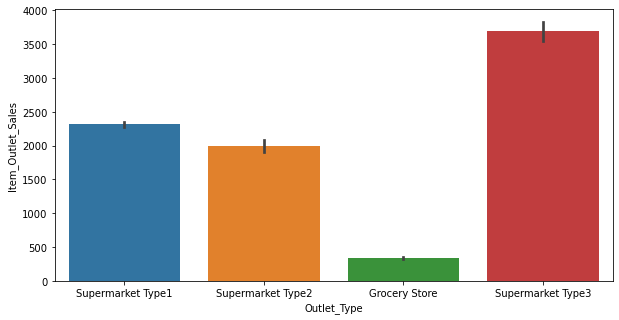

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=bm_ds)
plt.show()

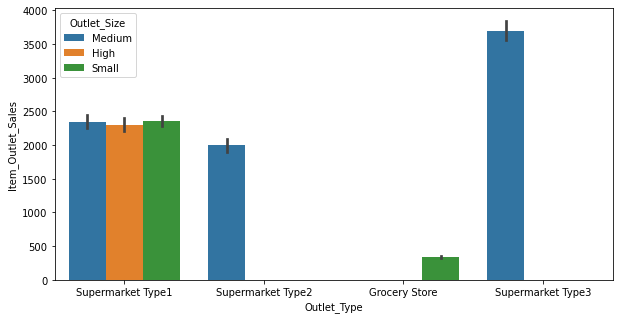

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=bm_ds)
plt.show()

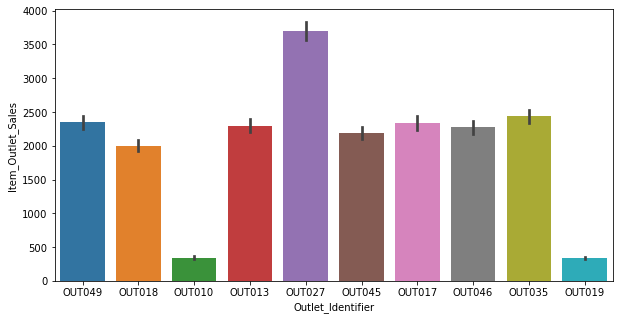

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=bm_ds)
plt.show()

In [20]:
bm_ds['Outlet_Size']  = bm_ds['Outlet_Size'].fillna(bm_ds['Outlet_Size'].mode()[0])

In [21]:
bm_ds['Outlet_Size'].isnull().sum()

0

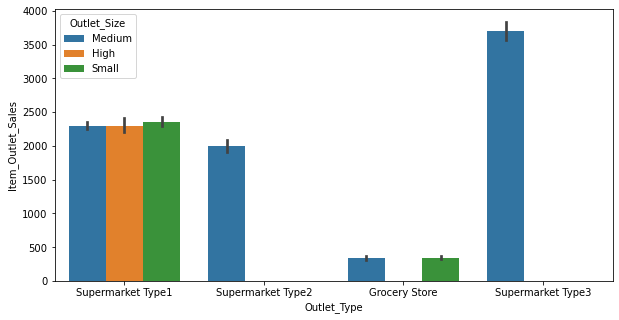

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=bm_ds)
plt.show()

Grocery stores report far fewer sales than the other Outlet_Types and they have Outlet_Size values that are either 'small' or 'nan'. Therefore we can reasonably replace the mode value of Grocery Stores with 'medium' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

Note also that Type 2 stores are all medium and Type 3 are also all medium size. Type 1 stores have all sizes, which all have similar sales.

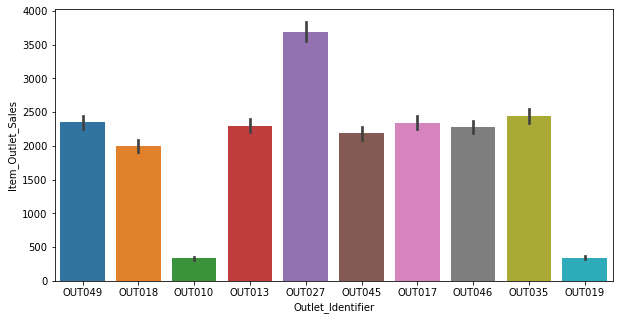

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=bm_ds)
plt.show()

In [24]:
out_size_mode=bm_ds.pivot_table(values='Outlet_Size',index='Outlet_Identifier',aggfunc=lambda x:x.mode())
out_size_mode

,Outlet_Size
Outlet_Identifier,
OUT010,Medium
OUT013,High
OUT017,Medium
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Medium
OUT046,Small


In [25]:
print(bm_ds['Outlet_Size'].head(10))
print(bm_ds.info())

0    Medium
1    Medium
2    Medium
3    Medium
4      High
5    Medium
6      High
7    Medium
8    Medium
9    Medium
Name: Outlet_Size, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Ou

In [26]:
outlet_identifier_mode_size = bm_ds.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x:x.mode()))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT010,Medium
OUT013,High
OUT017,Medium
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Medium
OUT046,Small


In [27]:
bm_ds.pivot_table(values='Outlet_Type', index='Outlet_Identifier', aggfunc=(lambda x:x.mode()))

,Outlet_Type
Outlet_Identifier,
OUT010,Grocery Store
OUT013,Supermarket Type1
OUT017,Supermarket Type1
OUT018,Supermarket Type2
OUT019,Grocery Store
OUT027,Supermarket Type3
OUT035,Supermarket Type1
OUT045,Supermarket Type1
OUT046,Supermarket Type1


It is reasonable that OUT017 and OUT045 are imputed with small because their mode Outlet_Type is Supermarket Type 1 which has mode Outlet_Size small.

## Item_Visibility

The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

We want to replace the 0 values for the mean visibility value of that product in each store.

In [28]:
bm_ds['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

In [29]:
bm_ds['Item_Visibility']=bm_ds['Item_Visibility'].replace({0:np.nan})

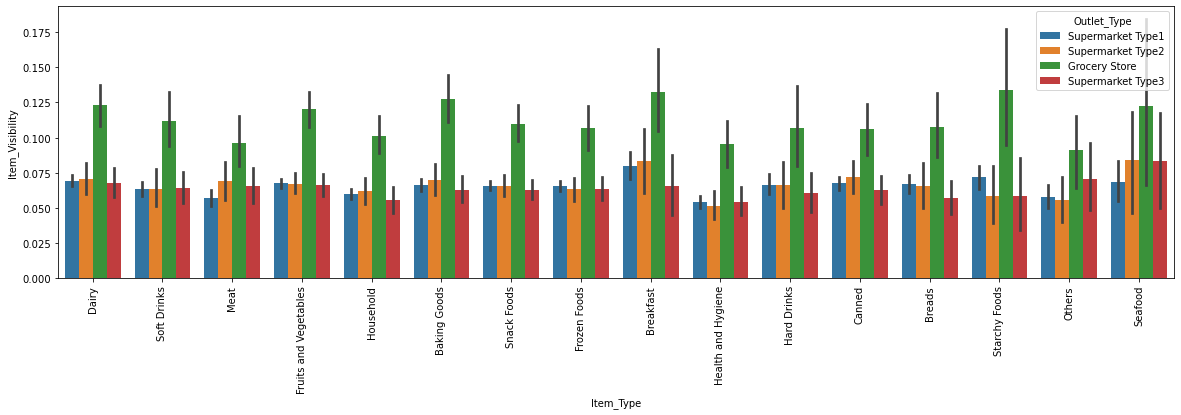

In [30]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x='Item_Type',y='Item_Visibility',hue='Outlet_Type',data=bm_ds)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [31]:
bm_ds['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than for Grocery Sotres; in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [32]:
table=bm_ds.pivot_table(values='Item_Visibility', index='Item_Type',columns='Outlet_Type',aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.127519,0.066025,0.069763,0.063000
Breads,0.107172,0.066962,0.065450,0.057083
Breakfast,0.132249,0.080078,0.083165,0.065450
Canned,0.106142,0.067540,0.072232,0.062376
Dairy,0.122944,0.069374,0.070324,0.067568
Frozen Foods,0.107033,0.065310,0.063023,0.063515
Fruits and Vegetables,0.120401,0.067442,0.067224,0.066292
Hard Drinks,0.107030,0.066509,0.065995,0.060225
Health and Hygiene,0.095284,0.053916,0.051457,0.054353


In [33]:
def find_mean(x):
    return table.loc[x['Item_Type'],x['Outlet_Type']]

In [34]:
bm_ds['Item_Visibility'].fillna(bm_ds[bm_ds['Item_Visibility'].isnull()].apply(find_mean, axis=1),inplace=True)

In [35]:
bm_ds['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.120401
4    0.059544
5    0.069763
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [36]:
bm_ds['Item_Fat_Content'] = bm_ds['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
bm_ds['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [37]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(bm_ds['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


## Feature Engineering

### Convert the Outlet_Establishment_Years into how old the establishments are

In [38]:
bm_ds['Outlet_Age']=2020-bm_ds['Outlet_Establishment_Year']
bm_ds['Outlet_Age'].head(5)

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Age, dtype: int64

In [39]:
bm_ds['Outlet_Age'].describe()

count    8523.000000
mean       22.168133
std         8.371760
min        11.000000
25%        16.000000
50%        21.000000
75%        33.000000
max        35.000000
Name: Outlet_Age, dtype: float64

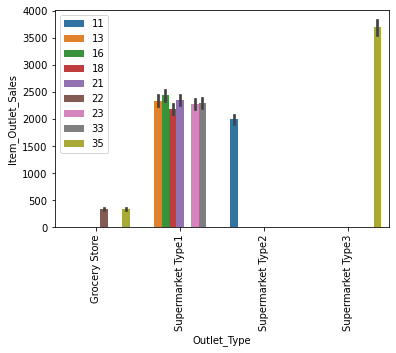

In [40]:
ax=sns.barplot(data=bm_ds, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')

## Observations:

- Grocery and Super market 3 are the oldest .
- Super market type 1 has been built at various times.
- Supermarket 2 is the latest 

In [41]:
bm_ds['Item_Category']=bm_ds['Item_Identifier'].map(lambda x:x[0:2])
bm_ds['Item_Category']=bm_ds['Item_Category'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})

In [42]:
bm_ds['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Category, dtype: int64

In [43]:
bm_ds.loc[bm_ds['Item_Category']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [44]:
bm_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,Food
3,FDX07,19.20,Regular,0.120401,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,Food
4,NCD19,8.93,Non-Edible,0.059544,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,Non-Consumable


In [45]:
bm_ds.drop('Item_Identifier',axis=1,inplace=True)

In [46]:
bm_ds.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,Drink
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,Food
3,19.20,Regular,0.120401,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22,Food
4,8.93,Non-Edible,0.059544,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,Non-Consumable


In [47]:
bm_ds.pivot_table(values='Item_MRP', index='Item_Type',columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,126.438068,125.975262,126.385315,128.809243
Breads,146.452873,140.567553,131.089007,145.676239
Breakfast,147.026989,141.656571,129.384500,147.083909
Canned,138.080808,140.021853,139.134218,140.625689
Dairy,147.166715,149.288209,145.738967,148.037063
Frozen Foods,133.499427,138.720939,144.062146,137.149955
Fruits and Vegetables,140.943517,145.878246,140.498458,145.009904
Hard Drinks,117.189350,135.246583,164.050791,143.576530
Health and Hygiene,133.791394,131.494766,126.550410,127.852417


All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

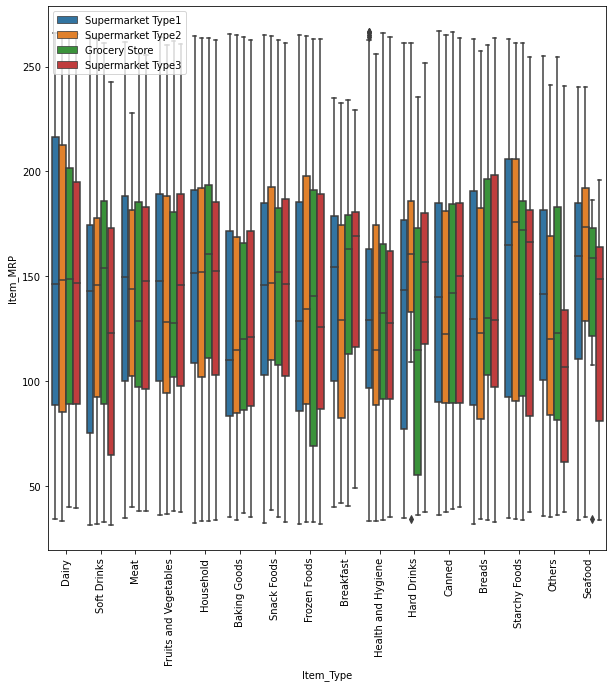

In [48]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data=bm_ds, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')
plt.show()

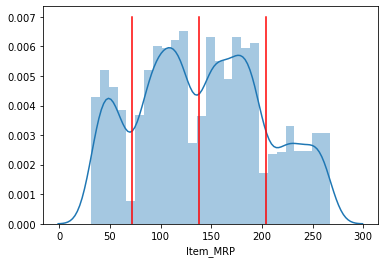

In [49]:
ax=sns.distplot(bm_ds['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [50]:
def pr_cat(x):
    
    if x<=x1:
        return 'Low'
    elif(x<=x1)&(x<=x2):
        return 'Medium'
    elif(x>=x2)&(x<=x3):
        return 'High'
    else:
        return 'Very High'
    
bm_ds['Item_MRP_Cat']=bm_ds['Item_MRP']
bm_ds['Item_MRP_Cat'] = bm_ds['Item_MRP_Cat'].apply(pr_cat)
bm_ds['Item_MRP_Cat'].value_counts()

Very High    4179
High         3002
Low          1342
Name: Item_MRP_Cat, dtype: int64

## Analysis

### Numerical analysis

In [51]:
bm_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.070440,140.992782,1997.831867,2181.288914,22.168133
std,4.22724,0.048885,62.275067,8.371760,1706.499616,8.371760
min,4.55500,0.003575,31.290000,1985.000000,33.290000,11.000000
25%,9.31000,0.033085,93.826500,1987.000000,834.247400,16.000000
50%,12.60000,0.060700,143.012800,1999.000000,1794.331000,21.000000
75%,16.00000,0.096335,185.643700,2004.000000,3101.296400,33.000000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,35.000000


## Item_MRP

As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outlet_Size.

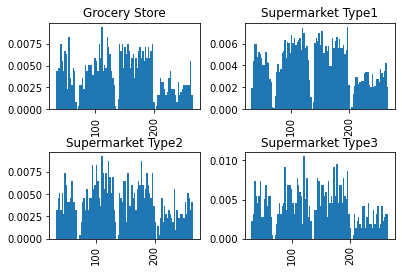

In [52]:
ax = bm_ds.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

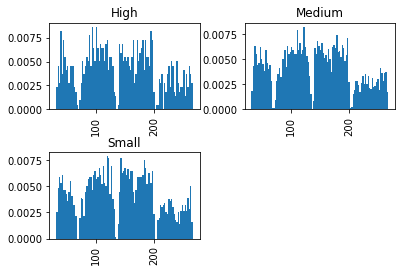

In [53]:
ax = bm_ds.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

<Figure size 720x720 with 0 Axes>

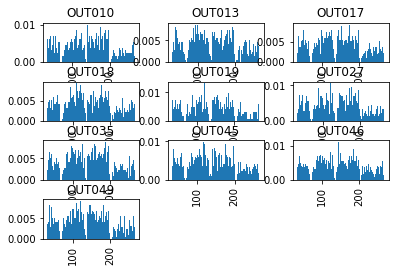

In [54]:
plt.figure(figsize=(10,10))
ax = bm_ds.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)
plt.show()

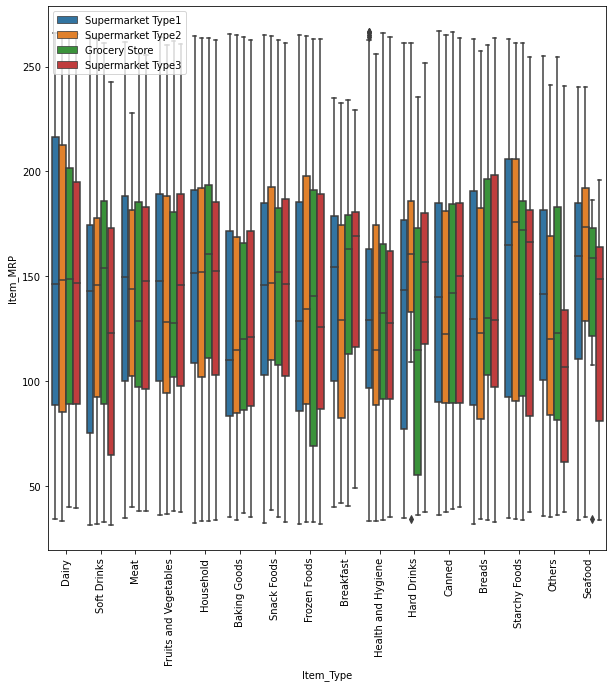

In [55]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(data=bm_ds, x='Item_Type', y='Item_MRP',hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


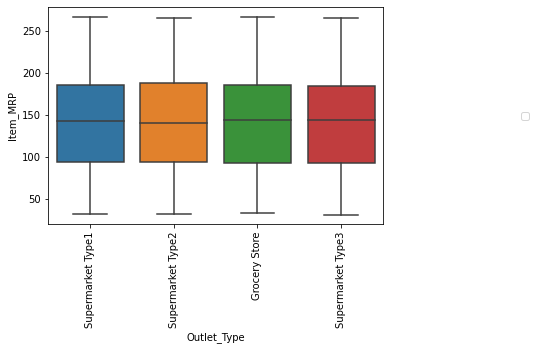

In [56]:
ax = sns.boxplot(data=bm_ds, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


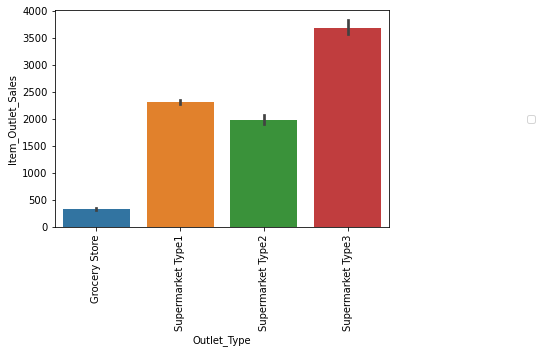

In [57]:
ax = sns.barplot(data=bm_ds, x='Outlet_Type', y='Item_Outlet_Sales',order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

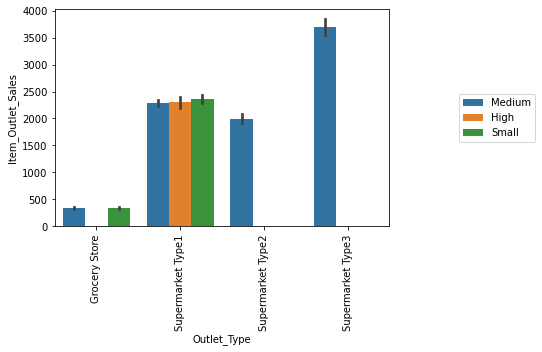

In [58]:
ax = sns.barplot(data=bm_ds, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size',order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

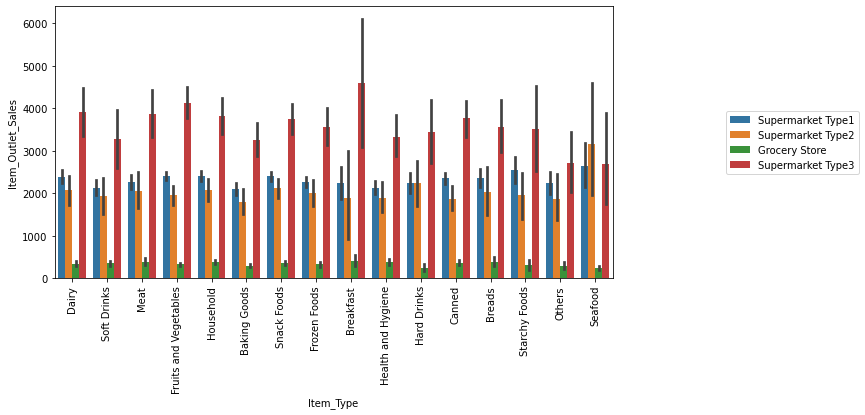

In [59]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=bm_ds, x='Item_Type', y='Item_Outlet_Sales',hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

- Grocery stores just sell a smaller number of everything.

[Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Supermarket Type1'),
 Text(0, 0, 'Supermarket Type2'),
 Text(0, 0, 'Supermarket Type3')]

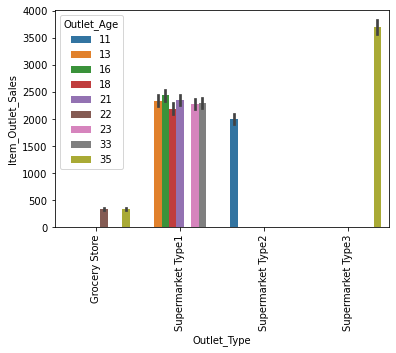

In [60]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.barplot(data=bm_ds, x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Age',order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Interestingly, type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

Now let's explore how each store (Outlet_Identifier) performs in sales:

[Text(0, 0, 'OUT049'),
 Text(0, 0, 'OUT018'),
 Text(0, 0, 'OUT010'),
 Text(0, 0, 'OUT013'),
 Text(0, 0, 'OUT027'),
 Text(0, 0, 'OUT045'),
 Text(0, 0, 'OUT017'),
 Text(0, 0, 'OUT046'),
 Text(0, 0, 'OUT035'),
 Text(0, 0, 'OUT019')]

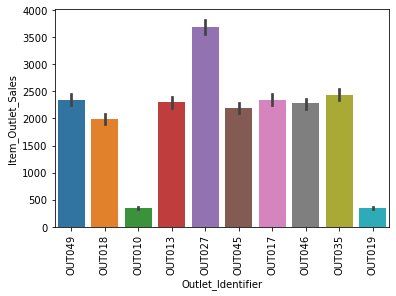

In [61]:
ax = sns.barplot(data=bm_ds, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [62]:
for i in bm_ds['Outlet_Identifier'].unique():
    otype = bm_ds[bm_ds['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = bm_ds[bm_ds['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


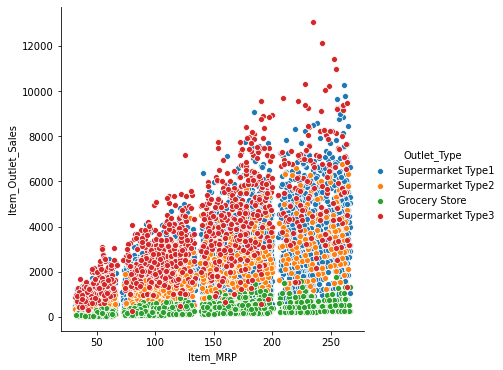

In [63]:
sns.pairplot(data=bm_ds, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

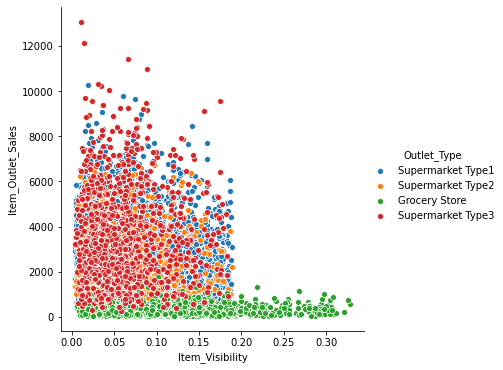

In [64]:
sns.pairplot(data=bm_ds, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [65]:
bm_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Outlet_Age                 8523 non-null   int64  
 12  Item_Category              8523 non-null   object 
 13  Item_MRP_Cat               8523 non-null   objec

In [66]:
bm_ds=bm_ds.drop('Outlet_Establishment_Year',axis=1)
bm_ds.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_Age                int64
Item_Category            object
Item_MRP_Cat             object
dtype: object

In [67]:
bm_ds["Item_Fat_Content"] = bm_ds["Item_Fat_Content"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type                 object
Item_MRP                 float64
Outlet_Identifier         object
Outlet_Size               object
Outlet_Location_Type      object
Outlet_Type               object
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [68]:
bm_ds["Item_Type"] = bm_ds["Item_Type"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier         object
Outlet_Size               object
Outlet_Location_Type      object
Outlet_Type               object
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [69]:
bm_ds["Outlet_Identifier"] = bm_ds["Outlet_Identifier"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size               object
Outlet_Location_Type      object
Outlet_Type               object
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [70]:
bm_ds["Outlet_Size"] = bm_ds["Outlet_Size"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type      object
Outlet_Type               object
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [71]:
bm_ds["Outlet_Location_Type"] = bm_ds["Outlet_Location_Type"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type               object
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [72]:
bm_ds["Outlet_Type"] = bm_ds["Outlet_Type"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category             object
Item_MRP_Cat              object
dtype: object

In [73]:
bm_ds["Item_Category"] = bm_ds["Item_Category"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category           category
Item_MRP_Cat              object
dtype: object

In [74]:
bm_ds["Item_MRP_Cat"] = bm_ds["Item_MRP_Cat"].astype('category')
bm_ds.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
Item_Outlet_Sales        float64
Outlet_Age                 int64
Item_Category           category
Item_MRP_Cat            category
dtype: object

In [75]:
bm_ds["Item_Fat_Content"] = bm_ds["Item_Fat_Content"].cat.codes
bm_ds["Item_Type"] = bm_ds["Item_Type"].cat.codes
bm_ds["Outlet_Identifier"] = bm_ds["Outlet_Identifier"].cat.codes
bm_ds["Outlet_Size"] = bm_ds["Outlet_Size"].cat.codes
bm_ds["Outlet_Location_Type"] = bm_ds["Outlet_Location_Type"].cat.codes
bm_ds["Outlet_Type"] = bm_ds["Outlet_Type"].cat.codes
bm_ds["Item_Category"] = bm_ds["Item_Category"].cat.codes
bm_ds["Item_MRP_Cat"] =bm_ds["Item_MRP_Cat"].cat.codes

In [76]:
bm_ds.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,Item_MRP_Cat
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,21,1,2
1,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228,11,0,1
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,21,1,0
3,19.20,2,0.120401,6,182.0950,0,1,2,0,732.3800,22,1,0
4,8.93,1,0.059544,9,53.8614,1,0,2,1,994.7052,33,2,1


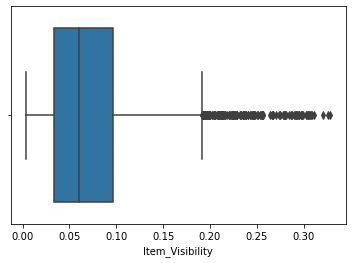

In [77]:
sns.boxplot(bm_ds['Item_Visibility'])

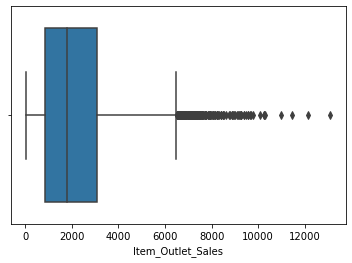

In [78]:
sns.boxplot(bm_ds['Item_Outlet_Sales'])

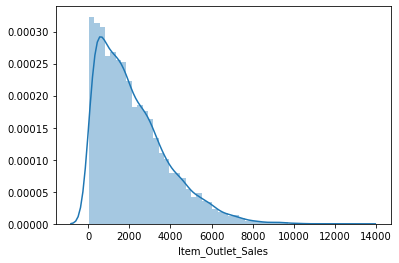

In [79]:
sns.distplot(bm_ds['Item_Outlet_Sales'])

In [80]:
bm_ds.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,Item_MRP_Cat
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.892995,0.070440,7.226681,140.992782,4.722281,1.170832,1.112871,1.201220,2181.288914,22.168133,1.093864,1.138097
std,4.22724,0.895005,0.048885,4.209990,62.275067,2.837201,0.600327,0.812757,0.796459,1706.499616,8.371760,0.522090,0.907507
min,4.55500,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,11.000000,0.000000,0.000000
25%,9.31000,0.000000,0.033085,4.000000,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400,16.000000,1.000000,0.000000
50%,12.60000,1.000000,0.060700,6.000000,143.012800,5.000000,1.000000,1.000000,1.000000,1794.331000,21.000000,1.000000,1.000000
75%,16.00000,2.000000,0.096335,10.000000,185.643700,7.000000,2.000000,2.000000,1.000000,3101.296400,33.000000,1.000000,2.000000
max,21.35000,2.000000,0.328391,15.000000,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,35.000000,2.000000,2.000000


In [81]:
bm_ds.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Category',
       'Item_MRP_Cat'],
      dtype='object')

In [82]:
bm_ds.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,Item_MRP_Cat
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,21,1,2
1,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228,11,0,1
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,21,1,0
3,19.20,2,0.120401,6,182.0950,0,1,2,0,732.3800,22,1,0
4,8.93,1,0.059544,9,53.8614,1,0,2,1,994.7052,33,2,1


In [83]:
bm_ds=bm_ds[bm_ds['Item_Visibility']>0]
bm_ds.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category,Item_MRP_Cat
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,21,1,2
1,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228,11,0,1
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,21,1,0
3,19.20,2,0.120401,6,182.0950,0,1,2,0,732.3800,22,1,0
4,8.93,1,0.059544,9,53.8614,1,0,2,1,994.7052,33,2,1


In [84]:
bm_ds.shape

(8523, 13)

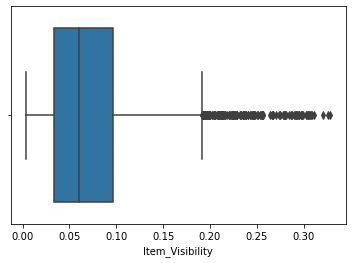

In [85]:
sns.boxplot(bm_ds['Item_Visibility'])

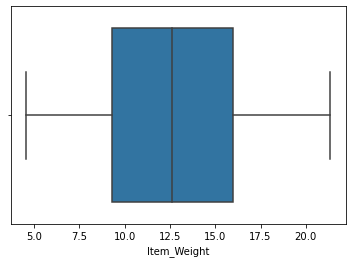

In [86]:
sns.boxplot(bm_ds['Item_Weight'])

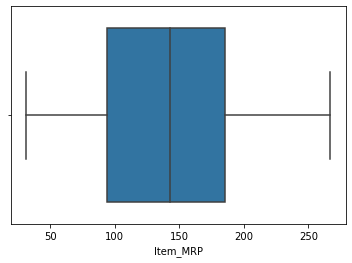

In [87]:
sns.boxplot(bm_ds['Item_MRP'])

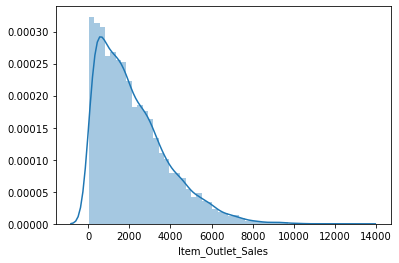

In [88]:
sns.distplot(bm_ds['Item_Outlet_Sales'])

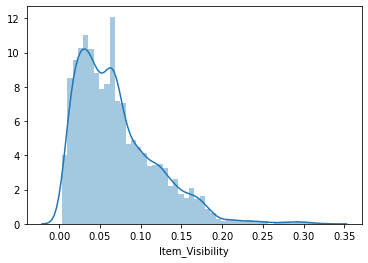

In [89]:
sns.distplot(bm_ds['Item_Visibility'])

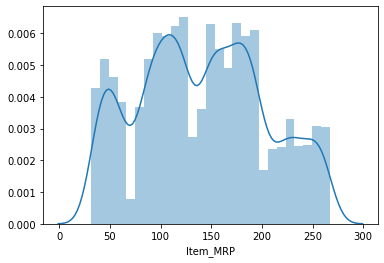

In [90]:
sns.distplot(bm_ds['Item_MRP'])

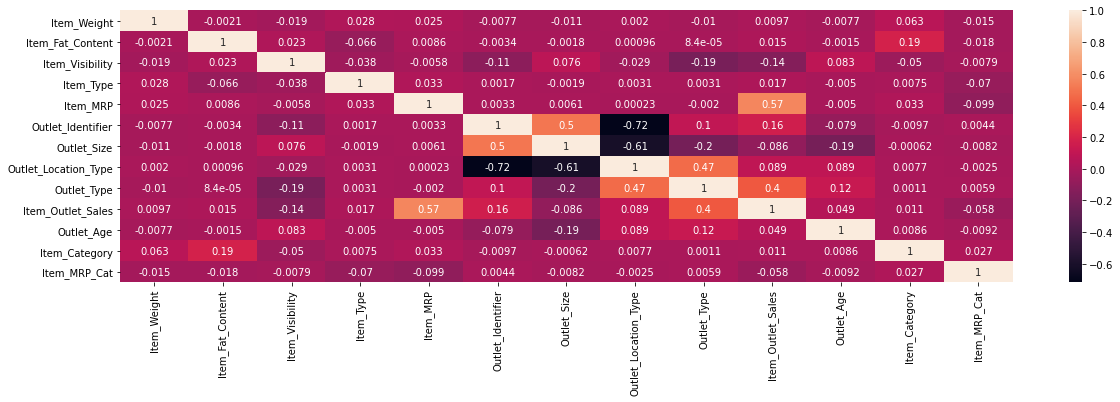

In [91]:
plt.figure(figsize=(20,5))
sns.heatmap(bm_ds.corr(),annot=True)

In [92]:
bm_ds.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Category',
       'Item_MRP_Cat'],
      dtype='object')

In [93]:
cor=bm_ds.corr()['Item_Outlet_Sales']
# convert series to dataframe so it can be sorted
correlation_df = pd.DataFrame(cor)
# correct column label from Points to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted

,Correlation
Item_Outlet_Sales,1.000000
Item_MRP,0.567574
Outlet_Type,0.401522
Outlet_Identifier,0.162325
Outlet_Location_Type,0.089367
Outlet_Age,0.049135
Item_Type,0.017048
Item_Fat_Content,0.015249
Item_Category,0.011236
Item_Weight,0.009693


In [94]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
X=bm_ds.drop('Item_Outlet_Sales',axis=1)
y=bm_ds['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Item_MRP_Cat
0,9.30,0,0.016047,4,249.8092,9,1,0,1,21,1,2
1,5.92,2,0.019278,14,48.2692,3,1,2,2,11,0,1
2,17.50,0,0.016760,10,141.6180,9,1,0,1,21,1,0
3,19.20,2,0.120401,6,182.0950,0,1,2,0,22,1,0
4,8.93,1,0.059544,9,53.8614,1,0,2,1,33,2,1


In [96]:
sc=StandardScaler()

In [97]:
X=sc.fit_transform(X)

In [98]:
X.shape

(8523, 12)

In [99]:
X

array([[-0.83118663, -0.99781318, -1.11274228, ..., -0.13954076,
        -0.17979501,  0.9498035 ],
       [-1.63080955,  1.23694223, -1.0466457 , ..., -1.33410274,
        -2.09528612, -0.1521806 ],
       [ 1.10872696, -0.99781318, -1.09816067, ..., -0.13954076,
        -0.17979501, -1.25416471],
       ...,
       [-0.52363935,  0.11956453, -0.72120599, ..., -0.73682175,
         1.73569609,  0.9498035 ],
       [-1.32562802,  1.23694223,  1.52982691, ..., -1.33410274,
        -0.17979501,  0.9498035 ],
       [ 0.46997492, -0.99781318, -0.5229313 , ...,  0.09937163,
        -2.09528612,  0.9498035 ]])

In [100]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.70)

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [102]:
linear =LinearRegression()

In [103]:
train_X.shape

(2556, 12)

In [104]:
model = linear.fit(train_X,train_y)

In [105]:
pred = model.predict(test_X)

In [106]:
test_X.shape

(5967, 12)

In [107]:
MSE_lin = mean_squared_error(test_y, pred)

In [108]:
MSE_lin

1435096.468573856

In [109]:
rmse=np.sqrt(MSE_lin)

In [110]:
rmse

1197.9551195991676

In [111]:
RF = RandomForestRegressor(n_estimators= 150)

In [112]:
model2=RF.fit(train_X,train_y)

In [113]:
rf_pred=model2.predict(test_X)

In [114]:
rf_pred

array([2384.69142133, 3278.52792133,  971.37112933, ..., 3954.41701067,
       1792.61767467, 3772.036636  ])

In [115]:
mse_rf=mean_squared_error(test_y,rf_pred)
mse_rf

1295846.0839635055

In [116]:
rmse_rf=np.sqrt(mse_rf)

In [117]:
rmse_rf

1138.3523549250933

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
dt=DecisionTreeRegressor(max_depth=5)

In [120]:
model3=dt.fit(train_X,train_y)

In [121]:
dt_pred=model3.predict(test_X)

In [122]:
dt_pred

array([2765.99580637, 2341.54618671,  884.95332632, ..., 4444.56542105,
       1751.30237053, 3295.10540167])

In [123]:
mse_dt=mean_squared_error(test_y,dt_pred)
mse_dt

1215082.3485621319

In [124]:
rmse_dt=np.sqrt(mse_dt)

In [125]:
rmse_dt

1102.307737685866

In [126]:
from sklearn.ensemble import BaggingRegressor

In [127]:
bgr=BaggingRegressor(n_estimators=100)

In [128]:
model4=bgr.fit(train_X,train_y)

In [129]:
bgr_pred=model4.predict(test_X)

In [130]:
bgr_pred

array([2346.984948, 3157.350102,  961.308672, ..., 4035.91315 ,
       1708.462774, 3698.092888])

In [131]:
mse_bgr=mean_squared_error(test_y,bgr_pred)
mse_bgr

1305024.4768638525

In [132]:
rmse_bgr=np.sqrt(mse_bgr)
rmse_bgr

1142.3766790616187

In [133]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train_X,train_y)
g=ada.predict(test_X)
ada_score=mean_squared_error(test_y,g)
ada_score=np.sqrt(ada_score)
ada_score

1184.7915952703188

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(train_X,train_y)
p=gb.predict(test_X)
gb_score=mean_squared_error(test_y,p)
gb_score=np.sqrt(gb_score)
gb_score

1104.363506693393

In [135]:
paramgrid={'criterion':['mse','mae'],
          'min_samples_split':[10,20,40],
          'max_depth':[2,6,8],
          'min_samples_leaf':[20,40,100],
          'max_leaf_nodes':[5,20,100]}

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
grid_dt=GridSearchCV(dt,paramgrid,cv=10)
grid_dt

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [138]:
grid_dt.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [188]:
print("Best Hyperparameters::\n{}".format(grid_dt.best_params_))

Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 10}


In [190]:
dt1=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=100,min_samples_leaf=40,min_samples_split=10)
dt1

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100, min_samples_leaf=40,
                      min_samples_split=10)

In [216]:
dt1.fit(train_X,train_y)
dt_opt=dt1.predict(test_X)
dt_score=mean_squared_error(test_y,dt_opt)
dt_score=np.sqrt(dt_score)
dt_score

1096.3689106661686

In [201]:
grid={'n_estimators':[10,50,100,1000],
     'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
     'subsample':[0.5,0.7,1.0],
     'max_depth':[3,7,9]}

In [202]:
gb_op=GridSearchCV(estimator=gb,param_grid=grid,scoring='neg_mean_squared_error',cv=10)

In [203]:
gb_op.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [10, 50, 100, 1000],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_squared_error')

In [204]:
gb_op.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}

In [205]:
model4=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=50,subsample=0.5)

In [217]:
model4.fit(train_X,train_y)
gb_opt=model4.predict(test_X)
gb_score=mean_squared_error(test_y,gb_opt)
gb_score=np.sqrt(gb_score)
gb_score

1094.4925838754884

In [139]:
bm_test=pd.read_csv("C:/Users/Administrator/Machine Learning/ML&DL Datasets/BigMart/test_AbJTz2l.csv")
bm_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [140]:
bm_test.shape

(5681, 11)

In [141]:
bm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [142]:
bm_test.apply(lambda x:len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [143]:
bm_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [144]:
cat_cols=[x for x in bm_test.dtypes.index if bm_test.dtypes[x]=='object']

cat_cols=[x for x in cat_cols if x not in ['Item_Identifier']]

for col in cat_cols:
    print('\nFrequency of Categories for variable %s'%(col))
    print(bm_ds[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
0    3918
2    3006
1    1599
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

Frequency of Categories for variable Outlet_Size
1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Type
1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


In [145]:
bm_test['Item_Weight'].describe().loc['50%']

12.5

In [146]:
bm_test['Item_Weight'].fillna(bm_test['Item_Weight'].describe().loc['50%'],inplace=True)

In [147]:
bm_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [148]:
bm_test['Outlet_Size']  = bm_test['Outlet_Size'].fillna(bm_test['Outlet_Size'].mode()[0])

In [149]:
bm_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [150]:
bm_test[bm_test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
56,FDA09,13.350,Regular,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1
90,FDN39,19.350,Regular,0.0,Meat,165.7816,OUT045,2002,Medium,Tier 2,Supermarket Type1
109,FDU14,17.750,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2
125,FDZ36,12.500,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3
140,DRF48,5.730,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,Medium,Tier 3,Grocery Store
150,FDL46,20.350,Low Fat,0.0,Snack Foods,118.9466,OUT049,1999,Medium,Tier 1,Supermarket Type1
168,FDS48,15.150,Low Fat,0.0,Baking Goods,150.4708,OUT045,2002,Medium,Tier 2,Supermarket Type1
185,NCN18,8.895,Low Fat,0.0,Household,110.9544,OUT049,1999,Medium,Tier 1,Supermarket Type1
222,FDN34,15.600,Regular,0.0,Snack Foods,169.2132,OUT046,1997,Small,Tier 1,Supermarket Type1
230,FDY45,17.500,Low Fat,0.0,Snack Foods,255.2356,OUT013,1987,High,Tier 3,Supermarket Type1


In [151]:
bm_test[bm_test['Outlet_Type']=='Grocery Store']['Item_Type']

2                      Others
12         Health and Hygiene
19                Snack Foods
23                     Others
25                Snack Foods
30                  Household
37               Baking Goods
41      Fruits and Vegetables
44                     Breads
46                      Dairy
58                Snack Foods
76                Snack Foods
78                Hard Drinks
89                      Dairy
104               Soft Drinks
106                    Canned
110     Fruits and Vegetables
112                    Canned
133              Baking Goods
135              Frozen Foods
138                    Canned
140               Soft Drinks
152                 Household
165              Baking Goods
169                    Canned
172                 Household
173              Baking Goods
184        Health and Hygiene
193                    Canned
196     Fruits and Vegetables
199              Frozen Foods
211                 Household
216                      Meat
220       

In [152]:
table=bm_test.pivot_table(values='Item_Visibility', index='Item_Type',columns='Outlet_Type',aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.090872,0.061973,0.062362,0.065783
Breads,0.108365,0.067792,0.067848,0.075155
Breakfast,0.091240,0.072192,0.082972,0.094691
Canned,0.115979,0.059845,0.046432,0.070764
Dairy,0.109350,0.066382,0.060470,0.065034
Frozen Foods,0.116251,0.061250,0.060619,0.064488
Fruits and Vegetables,0.101626,0.062668,0.063897,0.065833
Hard Drinks,0.107733,0.059108,0.056925,0.071265
Health and Hygiene,0.099603,0.052461,0.052537,0.051082


In [153]:
bm_test['Item_Visibility']=bm_test['Item_Visibility'].replace({0:np.nan})

In [154]:
def fin_mean(x):
    return table.loc[x['Item_Type'],x['Outlet_Type']]

In [155]:
bm_test['Item_Visibility'].fillna(bm_test[bm_test['Item_Visibility'].isnull()].apply(find_mean, axis=1),inplace=True)

In [156]:
bm_test[bm_test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [157]:
bm_test['Item_Visibility'].value_counts()

0.060936    35
0.062668    30
0.061973    24
0.061250    24
0.054281    24
0.052487    21
0.059845    19
0.052461    17
0.066382    12
0.063022     8
0.116251     7
0.048566     6
0.101626     6
0.059108     5
0.063897     5
0.060470     5
0.060619     5
0.072192     5
0.115536     5
0.065034     5
0.049379     5
0.064749     5
0.091643     4
0.057045     4
0.065783     4
0.059866     4
0.056935     4
0.062297     4
0.090872     4
0.085716     3
0.087583     3
0.051082     3
0.062362     3
0.046432     3
0.109350     3
0.070764     3
0.120932     2
0.093531     2
0.080293     2
0.045237     2
0.026297     2
0.111681     2
0.080456     2
0.014017     2
0.080226     2
0.026836     2
0.046635     2
0.077011     2
0.059067     2
0.064488     2
0.085204     2
0.112131     2
0.103864     2
0.112452     2
0.058132     2
0.060185     2
0.081772     2
0.058461     2
0.052069     2
0.079930     2
0.099603     2
0.052537     2
0.202948     2
0.203401     2
0.065800     2
0.072816     2
0.077169  

In [158]:
bm_test['Item_Fat_Content'] = bm_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
bm_test['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Low Fat
4    Regular
Name: Item_Fat_Content, dtype: object

In [159]:
bm_test['Outlet_Age']=2020-bm_test['Outlet_Establishment_Year']
bm_test['Outlet_Age'].head(5)

0    21
1    13
2    22
3    13
4    35
Name: Outlet_Age, dtype: int64

In [160]:
bm_test[bm_test['Outlet_Type']=='Supermarket Type1']['Item_Visibility']

0       0.007565
1       0.038428
3       0.015388
5       0.063817
8       0.123365
9       0.005698
10      0.103569
11      0.105811
13      0.092738
14      0.021206
15      0.079451
16      0.054135
20      0.109920
21      0.182619
22      0.065631
24      0.035179
26      0.035102
27      0.091485
28      0.058102
29      0.022940
34      0.096931
38      0.089486
42      0.178700
45      0.126278
47      0.053434
48      0.131155
49      0.075195
50      0.075558
51      0.122928
52      0.044442
53      0.100742
55      0.011279
56      0.060936
57      0.106953
59      0.029947
60      0.035565
61      0.047760
63      0.078184
64      0.086632
66      0.084930
67      0.072067
68      0.041257
69      0.058588
70      0.015711
73      0.067560
74      0.029505
75      0.045076
77      0.139452
79      0.065129
80      0.024817
82      0.034474
83      0.028988
84      0.032079
85      0.013593
86      0.015911
87      0.005589
88      0.139511
90      0.054281
94      0.0640

In [161]:
bm_test['Item_Category']=bm_test['Item_Identifier'].map(lambda x:x[0:2])
bm_test['Item_Category']=bm_test['Item_Category'].map({'FD':'Food','DR':'Drink','NC':'Non-Consumable'})

In [162]:
bm_test.loc[bm_test['Item_Category']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [163]:
bm_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,21,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food
2,NCN55,14.600,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,22,Non-Consumable
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35,Food


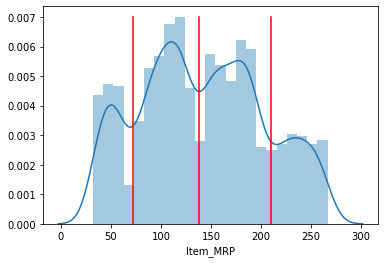

In [164]:
ax=sns.distplot(bm_test['Item_MRP'])
x1=72
x2=138
x3=210
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

In [165]:
def pr_cat(x):
    
    if x<=x1:
        return 'Low'
    elif(x<=x1)&(x<=x2):
        return 'Medium'
    elif(x>=x2)&(x<=x3):
        return 'High'
    else:
        return 'Very High'
    
bm_test['Item_MRP_Cat']=bm_test['Item_MRP']
bm_test['Item_MRP_Cat'] = bm_test['Item_MRP_Cat'].apply(pr_cat)
bm_test['Item_MRP_Cat'].value_counts()

Very High    2834
High         1978
Low           869
Name: Item_MRP_Cat, dtype: int64

In [166]:
bm_test.drop('Item_Identifier',axis=1,inplace=True)

In [167]:
bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Item_MRP_Cat
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,21,Food,Very High
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food,Very High
2,14.600,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,22,Non-Consumable,Very High
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,13,Food,High
4,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,35,Food,Very High


In [168]:
bm_test=bm_test.drop('Outlet_Establishment_Year',axis=1)
bm_test.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Outlet_Age                int64
Item_Category            object
Item_MRP_Cat             object
dtype: object

In [169]:
bm_test["Item_Fat_Content"] = bm_test["Item_Fat_Content"].astype('category')
bm_test["Item_Type"] = bm_test["Item_Type"].astype('category')
bm_test["Outlet_Identifier"] = bm_test["Outlet_Identifier"].astype('category')
bm_test["Outlet_Size"] = bm_test["Outlet_Size"].astype('category')
bm_test["Outlet_Location_Type"] = bm_test["Outlet_Location_Type"] .astype('category')
bm_test["Outlet_Type"] = bm_test["Outlet_Type"].astype('category')
bm_test["Item_Category"] = bm_test["Item_Category"].astype('category')
bm_test["Item_MRP_Cat"] = bm_test["Item_MRP_Cat"].astype('category')

In [170]:
bm_test.dtypes

Item_Weight              float64
Item_Fat_Content        category
Item_Visibility          float64
Item_Type               category
Item_MRP                 float64
Outlet_Identifier       category
Outlet_Size             category
Outlet_Location_Type    category
Outlet_Type             category
Outlet_Age                 int64
Item_Category           category
Item_MRP_Cat            category
dtype: object

In [171]:
bm_test["Item_Fat_Content"] = bm_test["Item_Fat_Content"].cat.codes
bm_test["Item_Type"] = bm_test["Item_Type"].cat.codes
bm_test["Outlet_Identifier"] = bm_test["Outlet_Identifier"].cat.codes
bm_test["Outlet_Size"] = bm_test["Outlet_Size"].cat.codes
bm_test["Outlet_Location_Type"] = bm_test["Outlet_Location_Type"].cat.codes
bm_test["Outlet_Type"] = bm_test["Outlet_Type"].cat.codes
bm_test["Item_Category"] = bm_test["Item_Category"].cat.codes
bm_test["Item_MRP_Cat"] =bm_test["Item_MRP_Cat"].cat.codes

In [172]:
bm_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category,Item_MRP_Cat
0,20.750,0,0.007565,13,107.8622,9,1,0,1,21,1,2
1,8.300,2,0.038428,4,87.3198,2,1,1,1,13,1,2
2,14.600,1,0.099575,11,241.7538,0,1,2,0,22,2,2
3,7.315,0,0.015388,13,155.0340,2,1,1,1,13,1,0
4,12.500,2,0.118599,4,234.2300,5,1,2,3,35,1,2


In [173]:
fin_test=sc.fit_transform(bm_test)

In [174]:
fin_test

array([[ 1.90508981, -1.00709156, -1.28025948, ..., -0.13989058,
        -0.19187262,  0.93545289],
       [-1.02745678,  1.23084592, -0.64459265, ..., -1.09551169,
        -0.19187262,  0.93545289],
       [ 0.45648246,  0.11187718,  0.61482692, ..., -0.02043794,
         1.72381871,  0.93545289],
       ...,
       [-0.62702873,  0.11187718,  0.07836306, ..., -0.4982485 ,
         1.72381871,  0.93545289],
       [ 0.6213646 ,  1.23084592, -0.20347228, ..., -1.09551169,
        -0.19187262,  0.93545289],
       [-0.74480168,  1.23084592,  0.72080097, ..., -0.4982485 ,
        -0.19187262,  0.93545289]])

In [175]:
pred1= model.predict(fin_test)

In [176]:
print(pred1)

[2032.59463325 1234.37511661 2041.77797189 ... 1735.91803073 3057.51604991
 1192.95923269]


In [177]:
pred2=model2.predict(fin_test)

In [178]:
print(pred2)

[1609.092124   1221.74743867  868.30085067 ... 1858.207852   3934.32760533
 1478.00054267]


In [179]:
pred3=model3.predict(fin_test)

In [180]:
pred3

array([1751.30237053, 1325.79312577,  816.39761905, ..., 1751.30237053,
       3295.10540167, 1325.79312577])

In [207]:
pred4=dt1.predict(fin_test)

In [208]:
pred4

array([1644.02054974, 1374.50467763,  607.82894884, ..., 1911.3869625 ,
       3389.38651163, 1374.50467763])

In [218]:
pred5=model4.predict(fin_test)

In [219]:
pred5

array([1586.34688136, 1277.62154858,  942.83910457, ..., 1955.7640008 ,
       3352.84168056, 1278.04441815])

In [181]:
sample=pd.read_csv("C:/Users/Administrator/Machine Learning/ML&DL Datasets/BigMart/sample_submission_8RXa3c6.csv")
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [220]:
sample['Item_Outlet_Sales'] = pred5

In [221]:
sample['Item_Outlet_Sales'] 

0       1586.346881
1       1277.621549
2        942.839105
3       2557.925971
4       5911.232314
5       1941.690944
6        662.900386
7       1825.416856
8       1489.174512
9       3183.573421
10      1877.989912
11      1328.662559
12       897.216461
13      1955.044825
14       840.922419
15      2490.653734
16      2821.099171
17      3151.146775
18      2787.842296
19       566.256372
20      2742.231862
21      3792.315999
22       785.009466
23       415.075800
24      2921.979421
25       837.546350
26       876.395862
27      2709.430998
28      3896.343829
29      1982.860091
30       106.465519
31      3062.548842
32       558.827741
33      5753.261919
34      2921.329774
35      5962.541783
36      1898.206126
37       460.890511
38      3119.590007
39      2595.003354
40      1974.380752
41       444.456611
42      2738.793742
43      2256.418427
44       721.740708
45      1714.991954
46       198.723053
47      3130.150194
48      3627.449157
49      2055.918635


In [222]:
df = pd.DataFrame(data=pred5)

In [223]:
df.head()

,0
0,1586.346881
1,1277.621549
2,942.839105
3,2557.925971
4,5911.232314


In [224]:
fin_sub = pd.concat([df,sample], axis = 1)

In [225]:
fin_sub

,0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1586.346881,FDW58,OUT049,1586.346881
1,1277.621549,FDW14,OUT017,1277.621549
2,942.839105,NCN55,OUT010,942.839105
3,2557.925971,FDQ58,OUT017,2557.925971
4,5911.232314,FDY38,OUT027,5911.232314
5,1941.690944,FDH56,OUT046,1941.690944
6,662.900386,FDL48,OUT018,662.900386
7,1825.416856,FDC48,OUT027,1825.416856
8,1489.174512,FDN33,OUT045,1489.174512
9,3183.573421,FDA36,OUT017,3183.573421


In [226]:
sample.to_csv('Submissions.csv',index=False)